In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import random

%matplotlib inline

from model import Schelling

In [2]:
model = Schelling(100, 0.9, 0.0, [0.6, 0.2, 0.2], 5, 4, 0.99, 5, False)
print(model.total_avg_cluster_size)

0.0


In [3]:
# Running the model for a maximum amount of steps
while model.running and model.schedule.steps < 200:
    model.step()
print(model.schedule.steps)

47


In [4]:
def WealthOnGrid(model):
    """
    Function that takes the model as input and finds the wealth of the agents at different points in the grid and puts that 
    into a numpy array. The wealth is then also plotted in a heatmap and returns the array with the wealths.
    """
    wealth_on_grid = np.zeros((model.grid.width, model.grid.height))

    for cell in model.grid.coord_iter():
        cell_content, x, y = cell
        if cell_content:
            wealth_on_grid[x][y] = cell_content.wealth

    plt.imshow(wealth_on_grid, interpolation="nearest")
    plt.colorbar()
    plt.show()
    
    return wealth_on_grid

In [5]:
def WealthSegregation(model, wealth_on_grid, x, y, plot=True):
    """
    Function that takes as input the model, the array with wealths per grid location and an x and y integer. This function 
    calculates the variance of a growing square in the grid, with starting location (x,y). It returns an array with the 
    variance per square side size.
    """
    # Initial values
    N = model.grid.width
    var_list = []
    L_list = []

    for L in range(1, N):
        
        # Determine the coordinates of the square based on the initial coordinate and L
        start_row = x - (L // 2)
        end_row = start_row + L
        start_col = y - (L // 2)
        end_col = start_col + L

        # Adjust the coordinates if they exceed the array boundaries
        if end_row > N:
            start_row -= end_row - N
            end_row = N
        if end_col > N:
            start_col -= end_col - N
            end_col = N
        if start_row < 0:
            end_row -= start_row
            start_row = 0
        if start_col < 0:
            end_col -= start_col
            start_col = 0

        # Calculate the variance of wealth in the square
        var = np.var(wealth_on_grid[start_row:end_row, start_col:end_col])

        # Append variance to list
        var_list.append(var)
        L_list.append(L)
    
    var_list.pop(0)
    L_list.pop(0)
    
    if plot:
        plt.plot(L_list, var_list)
        plt.xlabel("L")
        plt.ylabel("variance")
        plt.show()
    
    return var_list

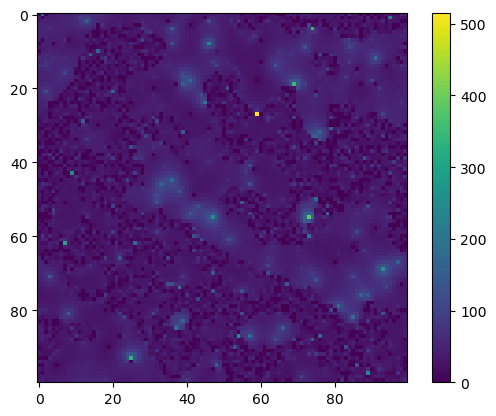

In [6]:
wealth_on_grid = WealthOnGrid(model)

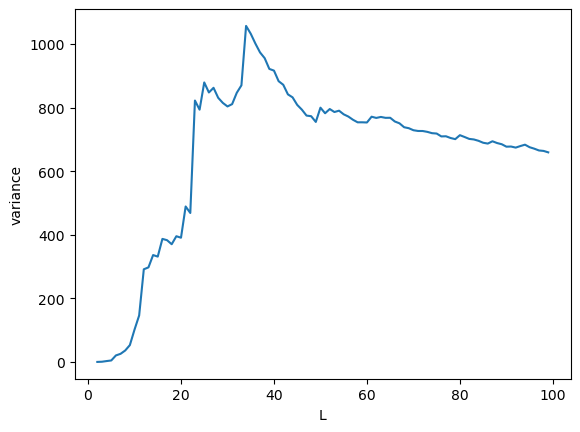

In [7]:
x = random.randint(0, model.grid.width-1)
y = random.randint(0, model.grid.width-1)

var_list = WealthSegregation(model, wealth_on_grid, x, y)

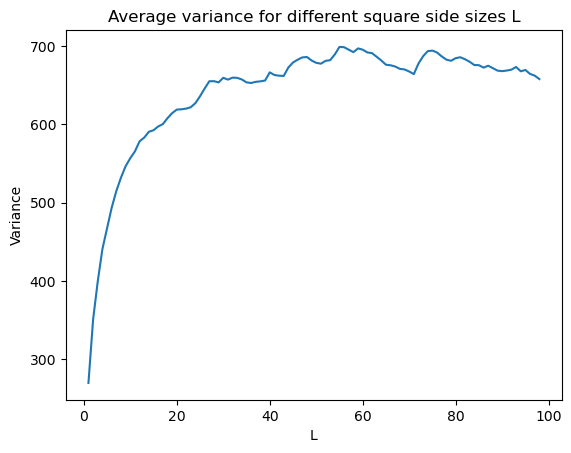

In [8]:
# Taking the average variance of the WealthSegregation function for every possible starting coordinate (x,y) 
var = np.zeros(model.grid.width-2)

for x in range(0,model.grid.width):
    for y in range(0, model.grid.height):
        var_list = WealthSegregation(model, wealth_on_grid, x, y, False)
        var += var_list

average_vars = var/(model.grid.width*model.grid.height)
L = np.array(range(1, model.grid.width-1))

plt.plot(L, average_vars)
plt.title("Average variance for different square side sizes L")
plt.xlabel("L")
plt.ylabel("Variance")
plt.show()

In [9]:
# Calculating half-time
end_value = average_vars[len(average_vars)-1]
half_time = np.interp(0.5*end_value, average_vars, L)

print(half_time)

1.7340391005348157


In [10]:
def derivative(x,y):
    derivative = np.zeros((len(x), len(y)))
    for i in range(len(x)-1):
        derivative[i] = (y[i] - y[i+1]) / (x[i] - x[i+1])
    return derivative

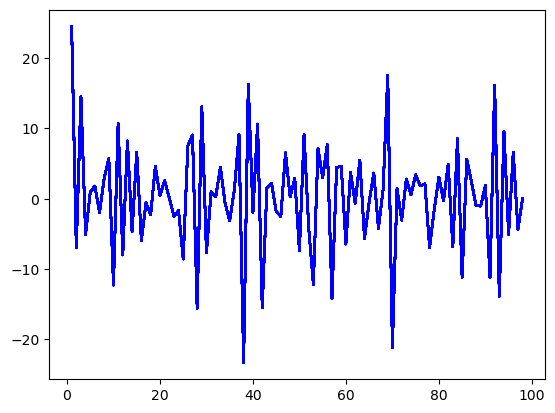

In [11]:
deriv = derivative(L, average_vars)
second_deriv = derivative(L, derivative(L, deriv))
plt.plot(L, second_deriv, '-b')
plt.show()

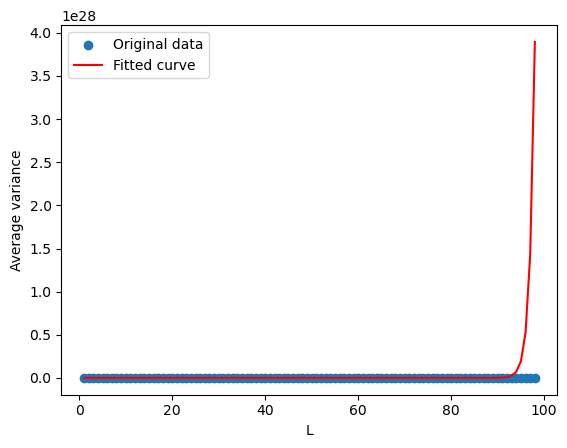

Exponent: 1.0000000035329666


In [12]:
# Fitting exponential function

def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

params, _ = curve_fit(exponential_func, L, average_vars)

exponent = params[1]

# Plot the original data and fitted curve
plt.scatter(L, average_vars, label='Original data')
plt.plot(L, exponential_func(L, *params), 'r-', label='Fitted curve')
plt.legend()
plt.xlabel('L')
plt.ylabel('Average variance')
plt.show()

print("Exponent:", exponent)

In [ ]:
# Fitting logaritmic fucntion

def logarithmic_func(x, a, b):
    return a * np.log(x) + b

params, _ = curve_fit(logarithmic_func, L, average_vars)

a_fit, b_fit = params

# Plot the original data and fitted curve
plt.scatter(L, average_vars, label='Original data')
plt.plot(L, logarithmic_func(L, a_fit, b_fit), 'r-', label='Fitted curve')
plt.legend()
plt.xlabel('L')
plt.ylabel('Average variance/L')
plt.show()

print("Base:", a_fit)

In [ ]:
# Calculating half-time
end_value = logarithmic_func(1000, a_fit, b_fit)
half_time = np.interp(0.5*end_value, logarithmic_func(L, a_fit, b_fit), L)

print(half_time)

In [ ]:
# Fitting exponentiation fucntion

def exponentiation_func(x, a, b, c):
    return b*a ** x + c

params, _ = curve_fit(exponentiation_func, L, average_vars)

print(average_vars)

a_fit, b_fit, c_fit = params

# Plot the original data and fitted curve
plt.scatter(L, average_vars, label='Original data')
plt.plot(L, exponentiation_func(L, a_fit, b_fit, c_fit), 'r-', label='Fitted curve')
plt.legend()
plt.xlabel('L')
plt.ylabel('Average variance')
plt.show()

print("exp:", a_fit)

In [ ]:
x = np.linspace(1, 100, 1000)
y = np.log(x)

plt.plot(x,y)